In [1]:
import pandas as pd
import numpy as np

import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
from sklearn.utils import resample

# ALGOS
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


from sklearn import metrics
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve



import warnings

warnings.filterwarnings('ignore')

In [2]:
modelling_df = pd.read_csv('../data/sinave4.csv')

In [3]:
modelling_df.shape

(341990, 74)

In [4]:
modelling_df2 = modelling_df.copy()

In [ ]:
# modelling_df.info()

In [ ]:
# modelling_df['estado'].value_counts(normalize = True)

In [ ]:
# modelling_df['estado'].value_counts()

In [ ]:
sintomas_list = ['fiebre', 'tos','odinofagia','disnea','irritabilidad','diarrea','dolor_toracico','calofrios', 'cefalea','mialgias','artralgias','ataque_al_estado_general','rinorrea','polipnea','vomito','dolor_abdominal','conjuntivitis','cianosis']
patologias_list = ['diabetes', 'epoc', 'asma', 'inmunosupresivo','hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca','obesidad', 'insuficiencia_renal_cronica', 'tabaquismo']

In [ ]:
# Create new dataframe just with sympthoms
modelling_sintomas_corr = modelling_df2[['fiebre', 'tos','odinofagia','disnea','irritabilidad','diarrea','dolor_toracico','calofrios', 'cefalea','mialgias','artralgias','ataque_al_estado_general','rinorrea','polipnea','vomito','dolor_abdominal','conjuntivitis','cianosis']]

In [ ]:
modelling_patologias_corr = modelling_df2[['diabetes', 'epoc', 'asma', 'inmunosupresivo','hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca','obesidad', 'insuficiencia_renal_cronica', 'tabaquismo']]

In [5]:
modelling_df3 = modelling_df2.copy()

In [6]:
# Convert to dummies
modelling_df3.replace(to_replace=['ACTIVOS LEVES','ACTIVOS GRAVES', 'RECUPERADOS', 'FALLECIDOS'], 
                                     value=[0,1,2,3],inplace=True)

In [ ]:
modelling_df2['estado'].value_counts(normalize = True)

# UNBALANCED MULTICLASS

In [8]:
features = ['fiebre', 'tos','odinofagia','disnea','irritabilidad','diarrea','dolor_toracico','calofrios', 'cefalea','mialgias','artralgias','ataque_al_estado_general','rinorrea','polipnea','vomito','dolor_abdominal','conjuntivitis','cianosis','diabetes', 'epoc', 'asma', 'inmunosupresivo','hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca','obesidad', 'insuficiencia_renal_cronica', 'tabaquismo', 'diabetes', 'epoc', 'asma', 'inmunosupresivo',
       'hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca',
       'obesidad', 'insuficiencia_renal_cronica', 'tabaquismo']

In [9]:
X = modelling_df3[features].copy()
y = modelling_df3['estado'].copy()

In [22]:
from collections import Counter
counter = Counter(y)

for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=162417 (47.492%)
Class=2, n=154526 (45.184%)
Class=3, n=19576 (5.724%)
Class=1, n=5471 (1.600%)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (273592, 40) (273592,)
Test set: (68398, 40) (68398,)


In [11]:
# estandarizamos los datos

ss = preprocessing.StandardScaler().fit(X_train.astype(np.float))
X_train = ss.transform(X_train.astype(np.float))
X_test = ss.transform(X_test.astype(np.float))

## Logistic Regression Classifier

In [12]:
# Confusion Matrix plotting function
# https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


In [13]:
# Encuentra los mejores hiperparámetros para logistic regression classifier
#Logistic Regression soporta solo solvers en ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]

solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
results_df = pd.DataFrame(index=cs)
results_df.index.name='C'
for s in solvers:
    results = []
    for c in cs:
        LR = LogisticRegression(C=c, solver=s, max_iter=4000, random_state=42).fit(X_train,y_train)
        y_pred = LR.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse_lr = mean_squared_error(y_test, y_pred)**0.5
        results.append(rmse_lr)
    results_df[s] = results
results_df

,newton-cg,lbfgs,sag,saga
C,,,,
0.0001,1.292513,1.292513,1.292536,1.292513
0.0010,1.294830,1.294830,1.294830,1.294830
0.0100,1.295710,1.295688,1.295721,1.295688
0.1000,1.295823,1.295755,1.295755,1.295823
1.0000,1.295846,1.295846,1.295750,1.295846
10.0000,1.295846,1.295846,1.295750,1.295846
100.0000,1.295846,1.295846,1.295750,1.295846


Confusion matrix, without normalization


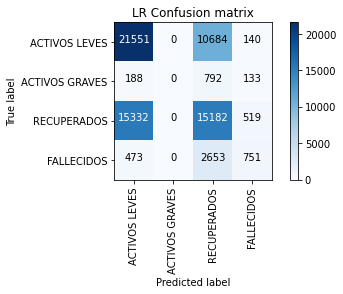

In [14]:
import itertools


# Ejecutamos logistic regression classifier y mostramos resultados

LR = LogisticRegression(C=0.0001, solver='newton-cg', random_state=42).fit(X_train,y_train)
y_pred = LR.predict(X_test)
y_pred_train = LR.predict(X_train)


LR_RMSE = mean_squared_error(y_test, y_pred)**0.5
LR_RMSE_train = mean_squared_error(y_train, y_pred_train)**0.5

LR_f_score = f1_score(y_test, y_pred, average='micro')
LR_f_score_train = f1_score(y_train, y_pred_train, average='micro')

LR_class_report = classification_report(y_test, y_pred)
LR_class_report_train = classification_report(y_train, y_pred_train)

LR_dict = classification_report(y_test, y_pred, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2,3])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ACTIVOS LEVES','ACTIVOS GRAVES','RECUPERADOS', 'FALLECIDOS'],normalize=False,  title='LR Confusion matrix')

In [15]:
print('Logistic Regression train RMSE:', round(LR_RMSE_train, 4))
print('Logistic Regression test RMSE:', round(LR_RMSE, 4))

print('\nLogistic Regression TRAIN classification report:\n\n', LR_class_report_train)
print('Logistic Regression TEST classification report:\n\n', LR_class_report)

Logistic Regression train RMSE: 1.2895
Logistic Regression test RMSE: 1.2925

Logistic Regression TRAIN classification report:

               precision    recall  f1-score   support

           0       0.58      0.67      0.62    130042
           1       0.00      0.00      0.00      4358
           2       0.52      0.49      0.50    123493
           3       0.49      0.19      0.27     15699

    accuracy                           0.55    273592
   macro avg       0.39      0.34      0.35    273592
weighted avg       0.54      0.55      0.54    273592

Logistic Regression TEST classification report:

               precision    recall  f1-score   support

           0       0.57      0.67      0.62     32375
           1       0.00      0.00      0.00      1113
           2       0.52      0.49      0.50     31033
           3       0.49      0.19      0.28      3877

    accuracy                           0.55     68398
   macro avg       0.39      0.34      0.35     68398
weight

## Decision Tree Classifier

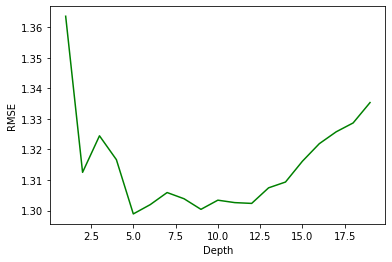

The best RMSE is 1.2989 with depth= 5


In [16]:
# Encuentra los mejores hiperparámetros para el decision tree classifier

#Usamos Cross Validation para encontrar la profundidad que de la precisión óptima

depth = 20 #20
mean_sqe = np.zeros((depth-1))
for n in range(1,depth): 
    DT = DecisionTreeClassifier(criterion="entropy", max_depth = n, random_state=42).fit(X_train,y_train)
    y_pred=DT.predict(X_test)
    
    mean_sqe[n-1] = mean_squared_error(y_test, y_pred)**0.5
plt.plot(range(1,depth),mean_sqe,'g')
plt.ylabel('RMSE')
plt.xlabel('Depth')
plt.show()
print("The best RMSE is", round(mean_sqe.min(), 4), "with depth=", mean_sqe.argmin()+1)

Confusion matrix, without normalization


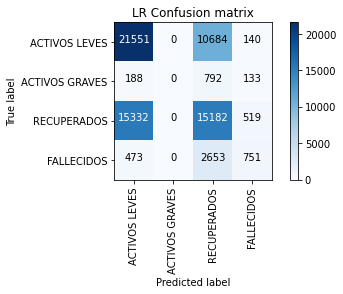

In [17]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 5, random_state=42).fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train = LR.predict(X_train)


LR_RMSE = mean_squared_error(y_test, y_pred)**0.5
LR_RMSE_train = mean_squared_error(y_train, y_pred_train)**0.5

LR_f_score = f1_score(y_test, y_pred, average='micro')
LR_f_score_train = f1_score(y_train, y_pred_train, average='micro')

LR_class_report = classification_report(y_test, y_pred)
LR_class_report_train = classification_report(y_train, y_pred_train)

LR_dict = classification_report(y_test, y_pred, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2,3])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ACTIVOS LEVES','ACTIVOS GRAVES','RECUPERADOS', 'FALLECIDOS'],normalize=False,  title='LR Confusion matrix')

In [18]:
print('Logistic Regression train RMSE:', round(LR_RMSE_train, 4))
print('Logistic Regression test RMSE:', round(LR_RMSE, 4))

print('\nLogistic Regression TRAIN classification report:\n\n', LR_class_report_train)
print('Logistic Regression TEST classification report:\n\n', LR_class_report)

Logistic Regression train RMSE: 1.2895
Logistic Regression test RMSE: 1.2925

Logistic Regression TRAIN classification report:

               precision    recall  f1-score   support

           0       0.58      0.67      0.62    130042
           1       0.00      0.00      0.00      4358
           2       0.52      0.49      0.50    123493
           3       0.49      0.19      0.27     15699

    accuracy                           0.55    273592
   macro avg       0.39      0.34      0.35    273592
weighted avg       0.54      0.55      0.54    273592

Logistic Regression TEST classification report:

               precision    recall  f1-score   support

           0       0.57      0.67      0.62     32375
           1       0.00      0.00      0.00      1113
           2       0.52      0.49      0.50     31033
           3       0.49      0.19      0.28      3877

    accuracy                           0.55     68398
   macro avg       0.39      0.34      0.35     68398
weight

## Random Forest Classifier

In [ ]:
results = []

for depth in range(1, 21):
    model = RandomForestClassifier(n_estimators = 500, max_depth=depth, random_state = 42)
    model.fit(X_train, y_train)
    
    result = {
        "model": model,
        "depth": depth,
        "n_estimators": n_estimators,
        "train_error": mean_squared_error(y_train, model.predict(X_train)**),
        "test_error": mean_squared_error(y_test, model.predict(X_test)**5)
    }
    
    results.append(result)